*****************************************************
# The Social Web Assignment 4: Recommendation

- Instructors: Davide Ceolin.
- TAs: Jacco van Ossenbruggen, Elena Beretta, Mirthe Dankloff.
- Exercises for Hands-on session 4 
*****************************************************

In this notebook you will use the similarity measures to provide recommendations by comparing users and content based on expressed preferences (ratings). You will also explore textual similarity using a very popular natural language processing library, NLTK. Finally, you will explore recommendations on the Reddit platform.

Required packages:
* feedparser, praw,  nltk

In [1]:
import sys

!pip install feedparser
!pip install praw
!pip install nltk

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In the snippets below, you can find:
* creation of a small toy database in form of a dictionary of dictionaries;
* issuing several similarity measures based on critics' preferences; and
* use those values to obtain meaningful statistics pertaining a user.

# Movie preferences of movie critics
As example data, let us define a python dictionary of movie critics and their ratings of a small set of movies


In [2]:
critics = {
    'Lisa Rose': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'Superman Returns': 3.5,
        'You, Me and Dupree': 2.5,
        'The Night Listener': 3.0,
    },
    'Gene Seymour': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 1.5,
        'Superman Returns': 5.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 3.5,
    },
    'Michael Phillips': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 3.5,
        'The Night Listener': 4.0,
    },
    'Claudia Puig': {
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'The Night Listener': 4.5,
        'Superman Returns': 4.0,
        'You, Me and Dupree': 2.5,
    },
    'Mick LaSalle': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Just My Luck': 2.0,
        'Superman Returns': 3.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 2.0,
    },
    'Jack Matthews': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'The Night Listener': 3.0,
        'Superman Returns': 5.0,
        'You, Me and Dupree': 3.5,
    },
    'Toby': {'Snakes on a Plane': 4.5, 
             'You, Me and Dupree': 1.0,
             'Superman Returns': 4.0},
}

# **Exercise 1: Finding Similar Users**

In the code below, two different simililarity measures are used: Euclidean distance and the Pearson correlation. If you are not familiar with them, we recommend you look them up to deepen your understanding.

## Euclidian distance

To assess the degree similarity between critics given their respective preferences, we can use the euclidian distance.
Its formula for an N-dimensional space is is: 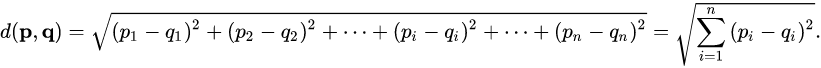
Because we want a smaller distance to indicate a larger similarity, we will use 1/d(p,q) as our similarity value:

In [6]:
from math import sqrt

def sim_distance(p1, p2, show_common_dims=False, prefs=critics):
    '''
    Returns a distance-based similarity score between two critics.
    '''

    # Get the list of shared_items
    common_items = []
    for movie in prefs[p1]:
        if movie in prefs[p2]:
            common_items.append(movie)
    # If they have no ratings in common, return 0
    if len(common_items) == 0:
        return 0
    if show_common_dims:
        print("common dimensions between {} and {}: ".format(p1, p2) + str(len(common_items)))
    # Add up the squares of all the differences
    sum_of_squares = sum([pow(prefs[p1][movie] - prefs[p2][movie], 2) for movie in common_items])
    
    # return sqrt(sum_of_squares)
    return 1 / sqrt(sum_of_squares)

Using this simple formula, you can calculate a similarity between two critics:

In [7]:
# get the distance between 'Lisa Rose' and 'Gene Seymour'
sim_distance('Lisa Rose','Gene Seymour') 

0.41702882811414954

Try this with other names so you can see who is closer or further.

In [11]:
print(sim_distance('Gene Seymour','Jack Matthews'))
print(sim_distance('Lisa Rose','Jack Matthews'))
print(sim_distance('Mick LaSalle','Jack Matthews'))

2.0
0.5163977794943222
0.4


Name at least two problems with the sim_distance function as it is defined above. 

Answer:
Problems:
1. Critics having the same rating will result in no outcome.
2. Each pair of critics needs to be inserted, which takes a lot of time. It would be a more helpful function if this could be done automatically.
    

A different measure of similarity can be given by pearson correlation.
Which follows: 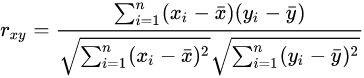

Where the dividend represents a measure of covariance between dimensions, whereas the divisor is the product of the standard deviation of the scores given by each user.

In [12]:
def sim_pearson(p1, p2, prefs=critics, verbose=False):
    '''
    Returns the Pearson correlation coefficient for p1 and p2.
    '''

    '''Step 1: Get the list of mutually rated items'''
    common_items = []
    dic = {}
    for movie in prefs[p1]:
        if movie in prefs[p2]:
            common_items.append(movie)
    # If they are no ratings in common, return 0
    if len(common_items) == 0:
        return 0
    '''Step 2: Sum calculations'''
    n_common_items = len(common_items)
    sum1 = sum([prefs[p1][movie] for movie in common_items])
    sum2 = sum([prefs[p2][movie] for movie in common_items])
    # Sums of squares
    sum1Sq = sum([pow(prefs[p1][movie], 2) for movie in common_items])
    sum2Sq = sum([pow(prefs[p2][movie], 2) for movie in common_items])
    # Sum of the products
    pSum = sum([prefs[p1][movie] * prefs[p2][movie] for movie in common_items])
    # Calculate r (Pearson score)
    num = pSum - sum1 * sum2 / n_common_items
    den = sqrt((sum1Sq - pow(sum1, 2) / n_common_items) * (sum2Sq - pow(sum2, 2) / n_common_items))
    if den == 0:
        return 0
    r = num / den
    if verbose:
        print("common dimensions: %s" % len(common_items))
        print("Similarity Score for {} and {}: {}".format(p1, p2, r))
    return r

# for k in critics.keys():
#     sim_pearson('Michael Phillips', k, verbose=True)

Try the examples you used for the eucledian distance again, but now using the pearson correlation:

In [13]:
sim_pearson('Lisa Rose','Gene Seymour')

0.39605901719066977

### Ranking critics on similarity
The topMatches function below calculates all similarities of a given critic with his peers:

In [14]:
def topMatches(person, n=5, similarity=sim_pearson, prefs=critics):
    '''
    Returns the best matches for person from the prefs dictionary. 
    Number of results and similarity function are optional params.
    '''
    if similarity not in [sim_distance, sim_pearson]:
        # NB: here we are comparing FUNCTION DEFINITION.
        # We do that only in a jupyter notebook for the sake of simplicity.
        raise ValueError("Callback functions should be: 'sim_pearson' or 'sim_distance'.")
        
    scores = [(similarity(person, other, prefs=prefs), other) for other in prefs
              if other != person]
    scores.sort()
    scores.reverse()
    return scores[0:n]

So you can now get the 3 critics closest to Toby by calling:

In [15]:
topMatches('Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

*****************************************************
### Task: Effect of similarity function used
Call the topMatches function on a number of critics with both the default sim_pearson, but also with the sim_distance function. Would you have preference of one over the other? 
*****************************************************

In [16]:
topMatches('Mick LaSalle',n=6)#simpearson
topMatches('Toby',n=6)#simpearson

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig'),
 (0.66284898035987, 'Jack Matthews'),
 (0.38124642583151164, 'Gene Seymour'),
 (-1.0, 'Michael Phillips')]

In [17]:
topMatches('Mick LaSalle',n=6, similarity=sim_distance)
topMatches('Toby',n=6, similarity=sim_distance)

[(0.6666666666666666, 'Mick LaSalle'),
 (0.6324555320336759, 'Michael Phillips'),
 (0.5547001962252291, 'Claudia Puig'),
 (0.5345224838248488, 'Lisa Rose'),
 (0.3651483716701107, 'Jack Matthews'),
 (0.3481553119113957, 'Gene Seymour')]

Answer: 

The simpearson similarity function shows more variation in the distances between critics, therefore we would prefer simpearson.

### **Exercise 2: Recommending Items**

One way to recommend movies to a person would be to rate the movies she has not seen yet by using the scores of the others weighted by the similarity.

In [18]:
def getRecommendations(person, similarity=sim_pearson, prefs=critics):
    '''
    Gets recommendations for a person by using a weighted average
    of every other user's rankings
    '''
    if similarity not in [sim_distance, sim_pearson]:
        raise ValueError("Callback functions should be: 'sim_pearson' or 'sim_distance'.")

    totals = {}
    simSums = {}
    for other in prefs:
    # Don't compare me to myself
        if other == person:
            continue
        sim = similarity(person, other, prefs=prefs)
    # Ignore scores of zero or lower
        if sim <= 0: 
            continue
        for item in prefs[other]:
            # Only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                # Similarity * Score
                    totals.setdefault(item, 0)
                    # The final score is calculated by multiplying each item by the
                    #   similarity and adding these products together
                    totals[item] += prefs[other][item] * sim
                    # Sum of similarities
                    simSums.setdefault(item, 0)
                    simSums[item] += sim
    # Create the normalized list
    rankings = [(total / simSums[item], item) for (item, total) in
                totals.items()]
    # Return the sorted list
    rankings.sort()
    rankings.reverse()
    return rankings

In [19]:
getRecommendations('Toby', similarity=sim_distance)

[(3.4721701369256524, 'The Night Listener'),
 (2.7709066207646793, 'Lady in the Water'),
 (2.4349456273856207, 'Just My Luck')]

In [20]:
getRecommendations('Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

Note that the output does not only consist of a movie title, but also a guess at what the user's rating for each movie would be.

*****************************************************
### Task: Explainable recommendations
Can you also find out how to give information on how the recommendation is built up. For example about the 'closest' person that also watched this movie?
*****************************************************

In [27]:
#still need to do:
#this is the code of the getrecommendations function:
#need to implement For example about the 'closest' person that also watched this movie?
def ExplainableRecommendations(person, similarity=sim_pearson, prefs=critics):
    '''
    Gets recommendations for a person by using a weighted average
    of every other user's rankings
    '''
    if similarity not in [sim_distance, sim_pearson]:
        raise ValueError("Callback functions should be: 'sim_pearson' or 'sim_distance'.")

    totals = {}
    simSums = {}
    
    # get the first person that is the closest person
    pref_list = list(prefs)
    closest_person = pref_list[pref_list.index(person) + 1]
    print(f"the closest person to {person}: ",closest_person)
    sim = similarity(person, closest_person, prefs=prefs)
    print(f"the similarity of {closest_person} to {person}: ",sim)
    
    for other in prefs:
    # Don't compare me to myself
        if other == person:
            continue
        sim = similarity(person, other, prefs=prefs)
    # Ignore scores of zero or lower
        if sim <= 0: 
            continue      
    
        for item in prefs[other]:
            # Only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                # Similarity * Score
                    totals.setdefault(item, 0)
                    # The final score is calculated by multiplying each item by the
                    #   similarity and adding these products together
                    totals[item] += prefs[other][item] * sim
                    # Sum of similarities
                    simSums.setdefault(item, 0)
                    simSums[item] += sim
                    
    # Create the normalized list
    rankings = [(total / simSums[item], item) for (item, total) in
                totals.items()]
    # Return the sorted list
    rankings.sort()
    rankings.reverse()
    return rankings

ExplainableRecommendations('Jack Matthews')

the closest person to Jack Matthews:  Toby
the similarity of Toby to Jack Matthews:  0.66284898035987


[(2.150559004463025, 'Just My Luck')]

### **Exercise 3: Transformations** 
**You have been building recommendations based on similar users in Exercise 2, but you could of course also build recommendations based on similar items. In this exercise you will do this.** 

The function is essentially the same, but you need to transfer your data, from:

<code>{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}</code>

to

<code>{'Lady in the Water': {'Lisa Rose': 2.5,'Gene Seymour': 3.0},
'Snakes on a Plane': {'Lisa Rose': 3.5,'Gene Seymour': 3.5}}</code>

This is what the transformPrefs function does. 

You can now create a dictionary for movies with their scores assigned by different people by invoking:

In [28]:
def transformPrefs(prefs=critics):
    '''
    Transform the recommendations into a mapping where persons are described
    with interest scores for a given title e.g. {title: person} instead of
    {person: title}.
    '''
    result = {}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item, {})
            # Flip item and person
            result[item][person] = prefs[person][item]
    return result

In [29]:
movies = transformPrefs()
print(movies)

{'Lady in the Water': {'Lisa Rose': 2.5, 'Gene Seymour': 3.0, 'Michael Phillips': 2.5, 'Mick LaSalle': 3.0, 'Jack Matthews': 3.0}, 'Snakes on a Plane': {'Lisa Rose': 3.5, 'Gene Seymour': 3.5, 'Michael Phillips': 3.0, 'Claudia Puig': 3.5, 'Mick LaSalle': 4.0, 'Jack Matthews': 4.0, 'Toby': 4.5}, 'Just My Luck': {'Lisa Rose': 3.0, 'Gene Seymour': 1.5, 'Claudia Puig': 3.0, 'Mick LaSalle': 2.0}, 'Superman Returns': {'Lisa Rose': 3.5, 'Gene Seymour': 5.0, 'Michael Phillips': 3.5, 'Claudia Puig': 4.0, 'Mick LaSalle': 3.0, 'Jack Matthews': 5.0, 'Toby': 4.0}, 'You, Me and Dupree': {'Lisa Rose': 2.5, 'Gene Seymour': 3.5, 'Claudia Puig': 2.5, 'Mick LaSalle': 2.0, 'Jack Matthews': 3.5, 'Toby': 1.0}, 'The Night Listener': {'Lisa Rose': 3.0, 'Gene Seymour': 3.0, 'Michael Phillips': 4.0, 'Claudia Puig': 4.5, 'Mick LaSalle': 3.0, 'Jack Matthews': 3.0}}


And find similar items for a particular movie like this:

In [30]:
topMatches('Superman Returns', prefs=movies)

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

Or find people who may like a particular movie:

In [31]:
getRecommendations('Just My Luck', prefs=movies)

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

*****************************************************
#### Task: why does the example above work?
Try to follow exactly what is going on in the last call. Notice that Michael and Jack did not rate 'Just my Luck'. How is their rating for it built up?
*****************************************************

Answer:

A prediction is provided by the function getRecommendations. To get a prediction, the function multiplies similarity and score.

### **Exercise 4: Sentence Similarity**

In [32]:
# import natural language processing software we need later.
import nltk
from nltk.stem import WordNetLemmatizer


In [33]:
# Download wordnet and punkt sentence tokenizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krolosabdou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krolosabdou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/krolosabdou/nltk_data...


True

Below we have some example sentences to compare later on.

In [34]:
movies = ["I saw a really good movie last night.",
"The movie is based on the director's life.",
"The movie starts at ten.",
"I took her to a movie.",
"The movie stars Al Pacino.",
"The movie opened last weekend.",
"The movie lasted two hours.",
"He directed several movies.", 
"We just shot another movie.", 
"The movie was set in New York."]

In [35]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

To get the Jaccard Similarity of two sentences however, we first need to do some preprocessing in the form of Lemmatization and Tokenization.

In [36]:
def compare(s1, s2):

    #Import a Lemmatizer to get the root form of certain words
    lemmatizer = WordNetLemmatizer() 
    
    #Tokenize both sentences to get each word separately
    word_list1 = nltk.word_tokenize(s1)
    word_list2 = nltk.word_tokenize(s2)
    
#     print("Tokenized sentence", word_list1) #Uncomment to see an example of the tokenized sentence 
    
    #Lemmatize both sentences
    lemmatized_output1 = ' '.join([lemmatizer.lemmatize(w, 'v') for w in word_list1])
    lemmatized_output2 = ' '.join([lemmatizer.lemmatize(w, 'v') for w in word_list2])
    
    return lemmatized_output1, lemmatized_output2

In [37]:
from nltk.stem import WordNetLemmatizer
for x in range(len(movies)):
    l1, l2 = compare(movies[0], movies[x])
    print("Sentence 1:", l1, '\n', "Sentence 2:", l2, '\n', "Similarity Score:", get_jaccard_sim(l1,l2))

Sentence 1: I saw a really good movie last night . 
 Sentence 2: I saw a really good movie last night . 
 Similarity Score: 1.0
Sentence 1: I saw a really good movie last night . 
 Sentence 2: The movie be base on the director 's life . 
 Similarity Score: 0.11764705882352941
Sentence 1: I saw a really good movie last night . 
 Sentence 2: The movie start at ten . 
 Similarity Score: 0.15384615384615385
Sentence 1: I saw a really good movie last night . 
 Sentence 2: I take her to a movie . 
 Similarity Score: 0.3333333333333333
Sentence 1: I saw a really good movie last night . 
 Sentence 2: The movie star Al Pacino . 
 Similarity Score: 0.15384615384615385
Sentence 1: I saw a really good movie last night . 
 Sentence 2: The movie open last weekend . 
 Similarity Score: 0.25
Sentence 1: I saw a really good movie last night . 
 Sentence 2: The movie last two hours . 
 Similarity Score: 0.25
Sentence 1: I saw a really good movie last night . 
 Sentence 2: He direct several movies . 
 Si

*****************************************************
#### Task: In what scenario's could the Jaccard Similarity be more useful than the Euclidean distance and the Pearson Similarity metrics? Why is that? 
*****************************************************

Answer:

The Euclidean distance is a distance based Metrics. Pearson and Jaccard are similarity based metrics. 

- Pearson similarity can be used to investigate the relationship between two quantitative and continuous variables.
- Euclidean distance is the distance between two vectors and is used for numerical and continious variables. 
- Jaccard similarity is used for comparing two binary vectors. 

If you want to compute text similarity, you can better use the Jaccard similarity. Jaccard simliarity compares all of the terms in one document to those in another.

### **Exercise 5: Building a Reddit Recommender**

After having created your Reddit account, go to User Settings -> Safety & Privacy -> Manage third-party app authorization.
Here, you will create your own app. Give it a name, and add "https://www.reddit.com/prefs/apps/" to the redirect uri. Keep the other settings as they are.
You may encounter some issues accessing "https://www.reddit.com/prefs/apps/" in Chrome. If so, try with another browser.

* replace the '???' in the user_agent string with your name (or any unique string).
* replace the '???' in the client_id with the id right underneath your web app name.
* replace the '???' in the client_secret with the key next to 'secret'.

NOTE: install praw v. 3.5 


In [38]:
# -*- coding: utf-8 -*-

import praw
import time

#Delete keys before handing in the notebook
r = praw.Reddit(user_agent='KrolosA', client_id='mt01EaNxC4C9Ijhj8hAEwQ',
                      client_secret='PIo5vmCpbeGA2IIh_a8PsUns0JM3JA',
                      redirect_url='https://www.reddit.com/prefs/apps/'
                                   'authorize_callback')


def initializeUserDict(subreddit, count=10):
    user_dict={}
    # get the top count' popular posts
    for post in r.subreddit(subreddit).top(limit=count):
        # find all users who commented in this
        flat_comments = post.comments.list()
        for comment in flat_comments:
            try:
                user = comment.author.name
                user_dict[user] = {}
            except AttributeError:
                pass
    return user_dict

def fillItems(user_dict, count=100):
    all_items={}
    # Find links posted by all users
    for user in user_dict:
        # print("finding subreddits where user " + user + "has commented")
        # find new comments for given user
        comments = r.redditor(user).comments.new(limit=count)
        for c in comments:
            # Get the subreddit where the comment was made
            subreddit = c.subreddit
            sub_name = subreddit.display_name
            # print(sub_name)
            if sub_name in user_dict[user]:
                user_dict[user][sub_name] += 1.0
            else:
                user_dict[user][sub_name] = 1.0
            
            all_items[sub_name] = 1
#     Fill in missing items with 0
#     for subr_counts in user_dict.values():
#         for item in all_items:
#             if item not in subr_counts:
#                 subr_counts[item]=0.0
    
    return user_dict
 

You can get a list of popular recent posts about programming from the programming subreddit (https://www.reddit.com/r/VUAmsterdam) by invoking the code below.  Don't forget to replace the '???' in the user_agent string with your name (or any unique string).

In [43]:
print("praw version == " + praw.__version__)

# subreddit = r.subreddit("programming")
for post in r.subreddit('VUAmsterdam').top(limit=5):
    print(end='\n * ')
    print(post.title)

praw version == 7.6.1

 * Opinions on Political Science: Global Politics

 * Menta Health Well-being at the VU

 * Coronavirus at the VU

 * Got accepted into cs program last year, but now it’s numerous fixus

 * Improving the subreddit


See here a list of other subreddits you can explore with this code: https://www.reddit.com/reddits/

To automatically create a data set of reddit users similar to the movie watchers you can invoke the initializeUserDict function in redditrec.py 

In [44]:
red_users=initializeUserDict('VUAmsterdam', count=15) # or for any other subreddit
print(red_users)

{'Digesta94': {}, 'CrazyRide72': {}, 'SenseiTrade': {}, 'BillHoudini': {}, 'angulardragon03': {}, '-BYeBYe-': {}, 'visvis': {}, 'samsungebluckburry': {}, 'PlantBeanVibes': {}, 'schuifdurrrr': {}, 'reks_rb': {}, 'No-Trip-3464': {}, 'Any_Watercress7798': {}, 'cariimejia16': {}, 'ElkNo1598': {}, 'Adorable_Suggestion4': {}, 'PawBud': {}, 'DomDom2002': {}, 'aitahb': {}, 'DigProgrammatically3': {}, 'rexygorl': {}, 'redmehalis': {}, 'Otherwise_Extreme_59': {}, 'wassup5551': {}, 'deepshitgoeshere': {}, 'These-Psychology-959': {}, 'macedoineGontran': {}, 'Thenextelonmusklol': {}, 'nfp267': {}, 'amaxs': {}, 'ImAClosetNerd': {}, 'Agreeable_Baseball87': {}, 'whocares4817': {}, 'Administrative_Fun_6': {}}


Now initializeUserDict has only created the user keys. We of course also want to know what subreddits they posted comments on. You can pull those in through:

In [45]:
fillItems(red_users, count=15)
# here you can see how often each user commented in what sub.

{'Digesta94': {'VUAmsterdam': 1.0},
 'CrazyRide72': {'StudyInTheNetherlands': 9.0,
  'VUAmsterdam': 3.0,
  'Denmark': 1.0,
  'Advice': 1.0,
  'MDMA': 1.0},
 'SenseiTrade': {'VUAmsterdam': 2.0,
  'FreeKarma4You': 1.0,
  'FitnessMaterialHeaven': 1.0,
  'AskReddit': 2.0,
  'overcominggravity': 3.0,
  'LifeProTips': 1.0,
  'bodyweightfitness': 1.0,
  'powerlifting': 2.0,
  'weightlifting': 2.0},
 'BillHoudini': {'tennis': 7.0,
  'europe': 1.0,
  'TechnoProduction': 1.0,
  'soccer': 1.0,
  'progmetal': 1.0,
  'DunderMifflin': 1.0,
  'footballmanagergames': 1.0,
  'Barca': 1.0,
  'Beatmatch': 1.0},
 'angulardragon03': {'VUAmsterdam': 10.0,
  'StudyInTheNetherlands': 1.0,
  'swift': 2.0,
  'apple': 1.0,
  'technology': 1.0},
 '-BYeBYe-': {'Windows10': 1.0,
  'Liverpool': 4.0,
  'Pixel6': 1.0,
  'AskReddit': 6.0,
  'VUAmsterdam': 1.0,
  'JoblessReincarnation': 1.0,
  'Minecraft': 1.0},
 'visvis': {'thenetherlands': 11.0,
  'Amsterdam': 1.0,
  'europe': 1.0,
  'StudyInTheNetherlands': 1.0,
  'A

This script may take a few minutes to collect all the data. Use this time to review what is going on in the code. Notice that users don't give ratings to subreddits, instead we are counting how many comments they posted in each subreddit. 

To recommend a similar user, we can use our topMatches function again.

First choose a random user for whom you're going to find neighbours

In [46]:
import random
user= random.choice( list( red_users.keys() ))
print (user) # print the username 
topMatches(user, prefs=red_users) # from all redditors, get the most similar to user

Administrative_Fun_6


[(1.0, 'No-Trip-3464'),
 (0, 'whocares4817'),
 (0, 'wassup5551'),
 (0, 'visvis'),
 (0, 'schuifdurrrr')]

If no similar user was found, you can try increasing the count of users or comments for each initializeUserDict and fillItems.

*****************************************************
#### Task: Recommend subreddits for a user based on what subreddits similar users have commented in. Recommend posts for a user based on posts they have commented on. 
*****************************************************

### Recommend subreddits for a user based on what subreddits similar users have commented in

In [71]:
def Subreddit_recommender(user, similarity=sim_pearson, prefs=red_users):
    """
    Finds subreddits that it can recommend to a user based on what subreddits
    similar users have commented in
    """
    
    if similarity not in [sim_distance, sim_pearson]:
        raise ValueError("Callback functions should be: 'sim_pearson' or 'sim_distance'.")
    
    totals = {}
    simSums = {}
    
    for other in prefs:
        
    # Don't compare me to myself
        if other == user:
            continue
        sim = similarity(user, other, prefs=prefs)
        
    # Ignore scores of zero or lower
        if sim <= 0: 
            continue
            
        for item in prefs[other]:
            # Only score subreddits I haven't seen yet
            if item not in prefs[user] or prefs[user][item] == 0:
                # Similarity * Score
                    totals.setdefault(item, 0)
                    # The final score is calculated by multiplying each item by the
                    #   similarity and adding these products together
                    totals[item] += prefs[other][item] * sim
                    # Sum of similarities
                    simSums.setdefault(item, 0)
                    simSums[item] += sim
                    
    # Create the normalized list
    rankings = [(total / simSums[item], item) for (item, total) in totals.items()]
    if rankings:
        # Return the sorted list
        rankings.sort()
        rankings.reverse()
        return rankings[0:3]
    else:
        print("No data")
  
user = random.choice( list( red_users.keys() ))
print (f"The first 3 subreddits recommended for {user} are:")
print(Subreddit_recommender(user))

The first 3 subreddits recommended for reks_rb are:
[(4.0, 'Kanye'), (3.0, 'NoFap'), (3.0, 'Drugs')]


### Recommend posts for a user based on posts they have commented on

In [94]:
def Dict_post(subreddit, count=200):
    """
    Makes an dictionary with as key the user and as values the posts they commented on
    """
        
    user_list = []
    user_post_dict={}
    
    # get the top popular posts
    for post in r.subreddit(subreddit).top(limit=count):
        
        # find all users who commented in this post
        post_comments = post.comments.list()
        
        for comment in post_comments:
            try:
                #get the dictionary of users and the posts
                user = comment.author.name
                if user not in user_post_dict:
                    user_post_dict[user] = {}
            except AttributeError:
                pass
            
        for comment in post_comments:
            try:
                user = comment.author.name
                post_title = post.title
                if post_title in user_post_dict[user]:
                    user_post_dict[user][post_title] += 1.0
                else:
                    user_post_dict[user][post_title] = 1.0
            except AttributeError:
                pass
            
    return user_post_dict

user_post_dict = Dict_post('VUAmsterdam')
print(user_post_dict)

{'Digesta94': {'Got accepted into cs program last year, but now it’s numerous fixus': 1.0}, 'CrazyRide72': {'Got accepted into cs program last year, but now it’s numerous fixus': 2.0}, 'SenseiTrade': {'Got accepted into cs program last year, but now it’s numerous fixus': 1.0, 'Very confused': 1.0}, 'BillHoudini': {'Improving the subreddit': 1.0}, 'angulardragon03': {'Improving the subreddit': 1.0, 'Can anyone tell me are you happy with the computer science program': 3.0, 'Just got into the Bsc Computer Science Program': 2.0, 'Can anyone tell me where this is? A friend send this and said that it was in one of the VU buildings.': 4.0, 'Laptop for CS': 3.0, 'URGENT HELP': 2.0, 'Computer Science Bachelor': 1.0, "I filled in my studielink profile information but now I am being asked to upload ID on VuNet. I don't have a username or password": 3.0, 'Tips for first year': 3.0, 'Master after BSc Computer Science @VU': 2.0, "Can anyone explain 7/12 rule mentioned in tuition fee calculator (http

In [96]:
def post_recommender(user, similarity=sim_pearson, prefs=posts_users_dict):
    """
    Finds posts that it can recommend to a user based on posts they have commented on
    """
    
    if similarity not in [sim_distance, sim_pearson]:
        raise ValueError("Callback functions should be: 'sim_pearson' or 'sim_distance'.")
        
    totals = {}
    simSums = {}
    users = list(set(prefs.keys()))
    
    for other in users:
    # Don't compare me to myself
        if other == user:
            continue
            
        try:
            sim = sim_distance(user, other, prefs=prefs)
        except ZeroDivisionError:
            sim = 0.0
            
    # Ignore scores of zero or lower
        if sim <= 0: 
            continue
            
        for item in prefs[other]:
            # Only score posts I haven't seen yet
            if item not in prefs[user] or prefs[user][item] == 0:
                # Similarity * Score
                    totals.setdefault(item, 0)
                    # The final score is calculated by multiplying each item by the
                    #   similarity and adding these products together
                    totals[item] += prefs[other][item] * sim
                    # Sum of similarities
                    simSums.setdefault(item, 0)
                    simSums[item] += sim
                    
    # Create the normalized list
    rankings = [(total / simSums[item], item) for (item, total) in totals.items()]
    if rankings:
        # Return the sorted list
        rankings.sort()
        rankings.reverse()
        return rankings[0:3]
    else:
        print("No such recommendation: Lack of data")

user= random.choice(list(set(user_post_dict.keys())))
print (f"The first 3 posts recommended for {user} are:")
post_recommender(user, similarity=sim_distance)

The first 3 posts recommended for reks_rb are:


[(4.0,
  'Can anyone tell me where this is? A friend send this and said that it was in one of the VU buildings.'),
 (3.0, 'Tips for first year'),
 (3.0, 'Laptop for CS')]